In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r"C:\Users\Brind\Downloads\Emprestimo.xlsx", sheet_name= 'Base_de_Dados')
df.head()

,ID,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,classif
0,1,41,17,12,35.9,11.90,0.504108,3.767992,0
1,2,30,13,8,46.7,17.88,1.352694,6.997266,0
2,3,40,15,14,61.8,10.64,3.438997,3.136523,0
3,4,41,15,14,72.0,29.67,4.165668,17.196732,0
4,5,57,7,37,25.6,15.86,1.498199,2.561961,0


In [4]:
#ver tipos de variaveis e tamanho de DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5000 non-null   int64  
 1   idade           5000 non-null   int64  
 2   experiencia     5000 non-null   int64  
 3   tempo_endereco  5000 non-null   int64  
 4   renda           5000 non-null   float64
 5   debito_renda    5000 non-null   float64
 6   cred_deb        5000 non-null   float64
 7   outros_debitos  5000 non-null   float64
 8   classif         5000 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 351.7 KB


In [6]:
#ver se de fato nao há dados nulos
df.isna().sum()

ID                0
idade             0
experiencia       0
tempo_endereco    0
renda             0
debito_renda      0
cred_deb          0
outros_debitos    0
classif           0
dtype: int64

In [7]:
#valores de dispersões básicas
df.describe()

,ID,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,classif
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,35.387200,8.703800,8.154000,47.676980,10.075984,1.628071,3.218582,0.251200
std,1443.520003,7.948403,7.194583,6.760786,51.793192,6.659336,3.053369,6.944523,0.433747
min,1.000000,20.000000,0.000000,0.000000,12.100000,0.080000,0.005292,0.009373,0.000000
25%,1250.750000,29.000000,3.000000,3.000000,24.500000,5.050000,0.396181,0.990071,0.000000
50%,2500.500000,35.000000,7.000000,7.000000,34.500000,8.635000,0.906189,1.960223,0.000000
75%,3750.250000,41.000000,13.000000,12.000000,54.725000,13.682500,1.859147,3.789633,1.000000
max,5000.000000,58.000000,38.000000,37.000000,2461.700000,44.620000,139.580606,416.517424,1.000000


- Para modelagem será necessário fazer tratamento com StandartScaler           

# Questão 1
- Qual o percentual de clientes inadimplentes na base (classif=1); 

In [11]:
df['classif'].value_counts(normalize = True, dropna = False)*100

0    74.88
1    25.12
Name: classif, dtype: float64

# Resposta : Percentual de inadimplente é 25,12%

# Questão 2
- Faça uma análise exploratória univariada e bivariada das variáveis; 

In [12]:
df.columns

Index(['ID', 'idade', 'experiencia', 'tempo_endereco', 'renda', 'debito_renda',
       'cred_deb', 'outros_debitos', 'classif'],
      dtype='object')

In [14]:
df.describe()

,ID,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,classif
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,35.387200,8.703800,8.154000,47.676980,10.075984,1.628071,3.218582,0.251200
std,1443.520003,7.948403,7.194583,6.760786,51.793192,6.659336,3.053369,6.944523,0.433747
min,1.000000,20.000000,0.000000,0.000000,12.100000,0.080000,0.005292,0.009373,0.000000
25%,1250.750000,29.000000,3.000000,3.000000,24.500000,5.050000,0.396181,0.990071,0.000000
50%,2500.500000,35.000000,7.000000,7.000000,34.500000,8.635000,0.906189,1.960223,0.000000
75%,3750.250000,41.000000,13.000000,12.000000,54.725000,13.682500,1.859147,3.789633,1.000000
max,5000.000000,58.000000,38.000000,37.000000,2461.700000,44.620000,139.580606,416.517424,1.000000


In [16]:
for colum in df.columns: 
    print(df[colum].value_counts())

1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: ID, Length: 5000, dtype: int64
33    250
31    228
32    227
36    216
29    214
30    212
28    212
37    209
34    205
35    201
39    192
26    192
38    190
41    180
40    175
27    171
43    161
42    156
25    151
44    141
24    139
45    134
46    107
23     98
47     84
48     83
49     81
22     79
50     62
21     54
51     53
52     35
54     28
53     27
55     21
20     18
56      9
57      3
58      2
Name: idade, dtype: int64
0     391
1     367
2     349
4     318
3     316
5     302
7     298
6     293
8     243
9     234
10    210
11    187
12    172
13    155
14    146
15    140
17    131
16    121
18     84
19     81
20     69
21     69
22     58
23     48
24     40
25     35
26     27
27     26
28     18
30     17
29     16
34      8
31      8
32      7
35      5
36      5
33      3
37      2
38      1
Name: experiencia, dtype: int64
2     407
1    

In [175]:
df.columns

Index(['ID', 'idade', 'experiencia', 'tempo_endereco', 'renda', 'debito_renda',
       'cred_deb', 'outros_debitos', 'classif'],
      dtype='object')

In [176]:
df_group = df.groupby('classif').agg({'idade' : 'mean',
                                     'experiencia': 'mean',
                                      'tempo_endereco' : 'mean',
                                      'renda' : 'mean', 
                                      'debito_renda' : 'mean',
                                       'cred_deb' : 'mean',
                                      'outros_debitos' : 'mean'
                                     })
df_group

,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos
classif,,,,,,,
0,36.236645,9.782051,8.974893,48.908600,8.612946,1.297557,2.895339
1,32.855096,5.489650,5.707006,44.005653,14.437142,2.613296,4.182136


# Resposta
- Todas as variáveis são do tipo quantitativas(tanto discretas quanto contínuas)
- Conseguimos observar também os valors máximos e mínimos de cada uma das colunas, assim como seus valores médios, seus quartis e o desvio padrão
- através do value counts conseguimos perceber as frequências de cada um das variáveis, podemos pegar a frequencia em valor numérico simples ou podemos pegar em valores percentuais
- Para variáveis contínuas é mais dificil ver uma contagem ou valores percentuais devido sua grande variedade
- Logo para as variáveis contínuas, devemos criar faixas para sua análise para diminuir a quantidade numérica dela
- quando fazemos todas as médias e segmentamos pela classificação de inadimplencia também vemos informações importantes como: a idade não parece ser um fator influenciante, pois a média é parecida, mas o tempo de experiencia é o dobro quando falamos sobre isso, entao podemos montar padrões e segmentar nossos clientes
- podemos fazer o mesmo para observarmos a idade mínima das ou renda mínima para podermos limitar a entrada de clientes na base e evitar a inadimplencia

# Questão 3
- Há algum outlier que mereça atenção? Há dados faltantes? 

In [44]:
df.isna().sum()

ID                0
idade             0
experiencia       0
tempo_endereco    0
renda             0
debito_renda      0
cred_deb          0
outros_debitos    0
classif           0
dtype: int64

<AxesSubplot:>

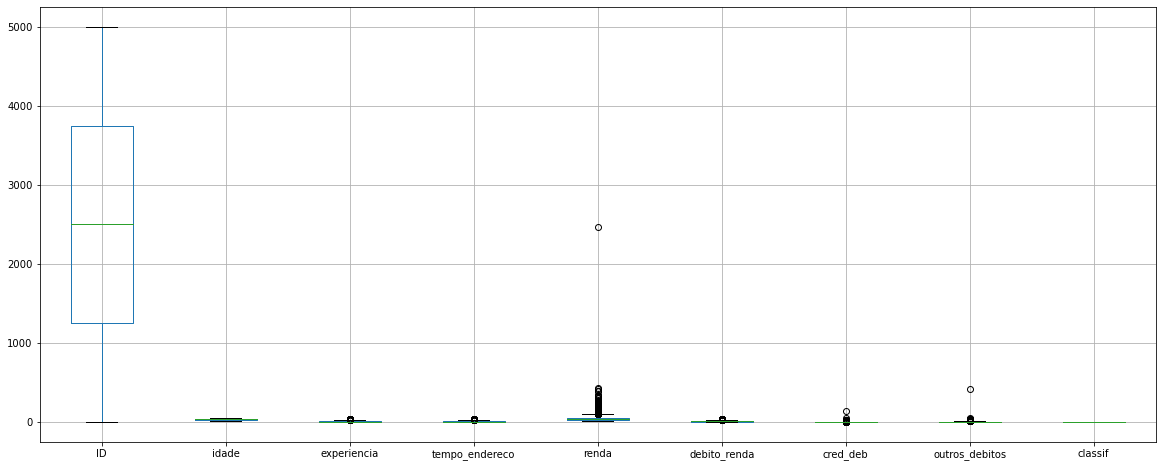

In [43]:
df.boxplot(figsize=(20 , 8))

# Resposta
- Não há nenhum dado faltante
- Há um outlier que precisa ser levado em consideração na parte da renda e um em outros debito

# Questão 4 (repetida)
- Qual o percentual de clientes inadimplentes na base (classif=1); 

# Resposta : Percentual de inadimplente é 25,12%

# Questão 5
- Verifique se há correlação entre as variáveis. Faça uma lista das variáveis por ordem de importância para a predição da variável classif;

In [45]:
df.corr()

,ID,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,classif
ID,1.000000,-0.002173,0.002018,-0.007283,0.021015,-0.008571,0.008226,0.011981,0.004779
idade,-0.002173,1.000000,0.559011,0.580612,0.400467,-0.019714,0.222039,0.202564,-0.184532
experiencia,0.002018,0.559011,1.000000,0.328398,0.511006,-0.016297,0.286104,0.250384,-0.258780
tempo_endereco,-0.007283,0.580612,0.328398,1.000000,0.211169,-0.017647,0.103693,0.093347,-0.209655
renda,0.021015,0.400467,0.511006,0.211169,1.000000,0.012391,0.741948,0.816931,-0.041060
debito_renda,-0.008571,-0.019714,-0.016297,-0.017647,0.012391,1.000000,0.366540,0.310966,0.379351
cred_deb,0.008226,0.222039,0.286104,0.103693,0.741948,0.366540,1.000000,0.773914,0.186907
outros_debitos,0.011981,0.202564,0.250384,0.093347,0.816931,0.310966,0.773914,1.000000,0.080372
classif,0.004779,-0.184532,-0.258780,-0.209655,-0.041060,0.379351,0.186907,0.080372,1.000000


# Resposta
- Quando falamos em correlações entre variáveis temos as correlações diretamente(valores positivos) e as inversamente proporcionais(valores negativos) e as que quase nao impactão na variavel alvo(valores próximos a 0.
- variáveis com mais impacto na variavel classif(target): debito_renda, experiencia, tempo_endereco, cred_deb, idade. As demais tem valores bem baixos, assim nao impactando tanto nas target

# Questao 6

In [51]:
import statsmodels.api as sm

In [47]:
df.columns

Index(['ID', 'idade', 'experiencia', 'tempo_endereco', 'renda', 'debito_renda',
       'cred_deb', 'outros_debitos', 'classif'],
      dtype='object')

In [53]:
#verificar significancia de cada variavel no modelo
X = df[['idade', 'experiencia', 'tempo_endereco', 'renda', 'debito_renda', 'cred_deb', 'outros_debitos']]
y = df['classif']

# adicionar o intercepto
X = sm.add_constant(X)

# Ajustar o modelo logístico
logit_model = sm.Logit(y, X)
result = logit_model.fit()
summary = result.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.404341
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                classif   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4992
Method:                           MLE   Df Model:                            7
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                  0.2826
Time:                        22:45:13   Log-Likelihood:                -2021.7
converged:                       True   LL-Null:                       -2818.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.0436      0.222     -4.695      0.000      -1.479      -0.608
idade            

C:\Users\Brind\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [56]:
#verificar significancia de cada variavel no modelo - retirando idade
X = df[['experiencia', 'tempo_endereco', 'renda', 'debito_renda', 'cred_deb', 'outros_debitos']]
y = df['classif']

# adicionar o intercepto
X = sm.add_constant(X)

# Ajustar o modelo logístico
logit_model = sm.Logit(y, X)
result = logit_model.fit()
summary = result.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.404379
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                classif   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4993
Method:                           MLE   Df Model:                            6
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                  0.2826
Time:                        22:49:20   Log-Likelihood:                -2021.9
converged:                       True   LL-Null:                       -2818.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9371      0.140     -6.689      0.000      -1.212      -0.663
experiencia      

C:\Users\Brind\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
#verificar significancia de cada variavel no modelo - retirando renda
X = df[['experiencia', 'tempo_endereco', 'debito_renda', 'cred_deb', 'outros_debitos']]
y = df['classif']

# adicionar o intercepto
X = sm.add_constant(X)

# Ajustar o modelo logístico
logit_model = sm.Logit(y, X)
result = logit_model.fit()
summary = result.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.404391
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                classif   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4994
Method:                           MLE   Df Model:                            5
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                  0.2825
Time:                        22:49:34   Log-Likelihood:                -2022.0
converged:                       True   LL-Null:                       -2818.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9728      0.094    -10.329      0.000      -1.157      -0.788
experiencia      

C:\Users\Brind\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
#verificar significancia de cada variavel no modelo - retirando outros_debitos
X = df[['experiencia', 'tempo_endereco', 'debito_renda', 'cred_deb']]
y = df['classif']

# adicionar o intercepto
X = sm.add_constant(X)

# Ajustar o modelo logístico
logit_model = sm.Logit(y, X)
result = logit_model.fit()
summary = result.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.404462
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                classif   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4995
Method:                           MLE   Df Model:                            4
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                  0.2824
Time:                        22:49:54   Log-Likelihood:                -2022.3
converged:                       True   LL-Null:                       -2818.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9904      0.092    -10.774      0.000      -1.171      -0.810
experiencia      

C:\Users\Brind\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Resposta
- As variáveis significantes são: experiencia, tempo_endereco, debito_renda, cred_deb

# Questão 7
- Calcule o KS do modelo. Esse modelo pode ser considerado bom?

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [196]:
#separar apenas as variáveis siginicantes
x = df[['experiencia', 'tempo_endereco', 'debito_renda', 'cred_deb']]
y = df[['classif']]

In [197]:
#separar em test e treino
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size= 0.3 , random_state= 42)

In [198]:
y

,classif
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,1
4998,0


In [205]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

C:\Users\Brind\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

C:\Users\Brind\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Brind\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


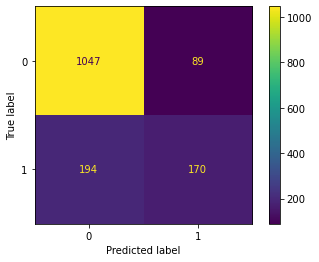

In [206]:
#observar atraves da métricas
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_lr.fit(x_train,y_train), x_test, y_test, values_format='d');

In [207]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, model_lr.predict(x_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, model_lr.predict(x_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, model_lr.predict(x_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, model_lr.predict(x_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, model_lr.predict(x_train))}")
print(f"Precision (Teste): {precision_score(y_test, model_lr.predict(x_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, model_lr.predict(x_train))}")
print(f"Recall (Teste): {recall_score(y_test, model_lr.predict(x_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, model_lr.predict(x_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, model_lr.predict(x_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, model_lr.predict_proba(x_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, model_lr.predict_proba(x_test)[:,1])}")

Acurácia (Treino): 0.8085714285714286
Acurácia (Teste): 0.8113333333333334
Acurácia Balanceada (Treino): 0.6911959407411483
Acurácia Balanceada (Teste): 0.6943439483052158
Precision (Treino): 0.690068493150685
Precision (Teste): 0.6563706563706564
Recall (Treino): 0.4517937219730942
Recall (Teste): 0.46703296703296704
F1-Score (Treino): 0.5460704607046071
F1-Score (Teste): 0.5457463884430176
ROCAUC (Treino): 0.8442606742964043
ROCAUC (Teste): 0.8391430312645102


In [209]:
y_pred_prob = model_lr.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_curve
# calcular as taxas de verdadeiros positivos (TPR) e falsos positivos (FPR)
fpr_sklearn, tpr_sklearn, thresholds_sklearn = roc_curve(y_test, y_pred_prob)

# calcular a estatística KS como a diferença máxima entre TPR e FPR
ks_statistic_sklearn = max(tpr_sklearn - fpr_sklearn)

ks_statistic_sklearn

0.5436078006500542

# Resposta
- Para o modelo em específico sem retirada de outliers e sem padronização de dados, temos uma modelagem com KS de 54%, sendo um valor relativamente bom. Para melhorarmos o modelos poderiamos retirar outliers, fazer padronização dos dados e posteriormente fazer o tuning do modelo.

# Questão 8
- Faça uma tabela com as faixas de score por decis. Uma coluna deverá ter o total de bons na faixa, a segunda coluna o total de maus, a terceira coluna o total da faixa, a quarta coluna a taxa de maus da faixa (maus/total). 

In [126]:
#fazer um DF com as probabilidades e os valores preditos para cada uma das linhas
y_pred = model_lr.predict(x_test)
df_teste = pd.DataFrame({"proba" : y_pred_prob, "classe": y_pred})
df_teste[(df_teste['proba']<= 0.2) & (df_teste['classe'] == 1)]

,proba,classe


In [154]:
#segmentando toda a base nas faixas de 0-0.2, 0.2-0.4, 0.4-0.6, 0.6-0.8 e 0.8-1

faixa_02_bom = df_teste[(df_teste['proba']<= 0.2) & (df_teste['classe'] == 0)]
faixa_02_mau = df_teste[(df_teste['proba']<= 0.2) & (df_teste['classe'] == 1)]
faixa_04_bom = df_teste[(0.2 < df_teste['proba'])
                        & (df_teste['proba']<=0.4)
                        & (df_teste['classe'] == 0)]
faixa_04_mau = df_teste[(0.2 < df_teste['proba'])
                        & (df_teste['proba']<=0.4)
                        & (df_teste['classe'] == 1)]
faixa_06_bom = df_teste[(0.4 < df_teste['proba'])
                        & (df_teste['proba']<=0.6)
                        & (df_teste['classe'] == 0)]
faixa_06_mau = df_teste[(0.4 < df_teste['proba'])
                        & (df_teste['proba']<=0.6)
                        & (df_teste['classe'] == 1)]
faixa_08_bom = df_teste[(0.6 < df_teste['proba'])
                        & (df_teste['proba']<=0.8)
                        & (df_teste['classe'] == 0)]
faixa_08_mau = df_teste[(0.6 < df_teste['proba'])
                        & (df_teste['proba']<=0.8)
                        & (df_teste['classe'] == 1)]
faixa_1_bom = df_teste[(0.8 < df_teste['proba'])
                        & (df_teste['proba']<=1)
                        & (df_teste['classe'] == 0)]
faixa_1_mau = df_teste[(0.8 < df_teste['proba'])
                        & (df_teste['proba']<=1)
                        & (df_teste['classe'] == 1)]
total_bom = df_teste[df_teste['classe'] == 0] 
total_mau = df_teste[df_teste['classe'] == 1] 

In [165]:
#fazer todos os valores para colocar eles no DF
contagem_bons = [faixa_02_bom['classe'].count(),faixa_04_bom['classe'].count(),faixa_06_bom['classe'].count()
                ,faixa_08_bom['classe'].count(),faixa_1_bom['classe'].count(), total_bom['classe'].count()]
contagem_maus = [faixa_02_mau['classe'].count(),faixa_04_mau['classe'].count(),faixa_06_mau['classe'].count()
                ,faixa_08_mau['classe'].count(),faixa_1_mau['classe'].count(), total_mau['classe'].count()]
total_linha = [faixa_02_bom['classe'].count() + faixa_02_mau['classe'].count(),
              faixa_04_bom['classe'].count() + faixa_04_mau['classe'].count(),
              faixa_06_bom['classe'].count() + faixa_06_mau['classe'].count(),
              faixa_08_bom['classe'].count() + faixa_08_mau['classe'].count(),
              faixa_1_bom['classe'].count() + faixa_1_mau['classe'].count(),
              total_bom['classe'].count() + total_mau['classe'].count()]
taxa_mau_total = [faixa_02_mau['classe'].count()/total_mau['classe'].count(),
                 faixa_04_mau['classe'].count()/total_mau['classe'].count(),
                 faixa_06_mau['classe'].count()/total_mau['classe'].count(),
                 faixa_08_mau['classe'].count()/total_mau['classe'].count(),
                 faixa_1_mau['classe'].count()/total_mau['classe'].count(),
                 0]

faixa = ['0.0-0.2', '0.2-0.4', '0.4-0.6','0.6-0.8', '0.8-1.0', 'total']
dicio = {'faixa': faixa,
        'bons' : contagem_bons,
        'maus' : contagem_maus,
        'total_linha' : total_linha,
        'taxa' : taxa_mau_total.format()}

# Resposta

In [166]:
pd.DataFrame(dicio)

,faixa,bons,maus,total_linha,taxa
0,0.0-0.2,812,0,812,0.000000
1,0.2-0.4,325,0,325,0.000000
2,0.4-0.6,104,74,178,0.285714
3,0.6-0.8,0,122,122,0.471042
4,0.8-1.0,0,63,63,0.243243
5,total,1241,259,1500,0.000000
